j3        -1.0      -0.9      -0.8      -0.7      -0.6      -0.5      -0.4  \
j4                                                                           
-1.0  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.9  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.8  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.7  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.6  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.5  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.4  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.3  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.2  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.1  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.0  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953

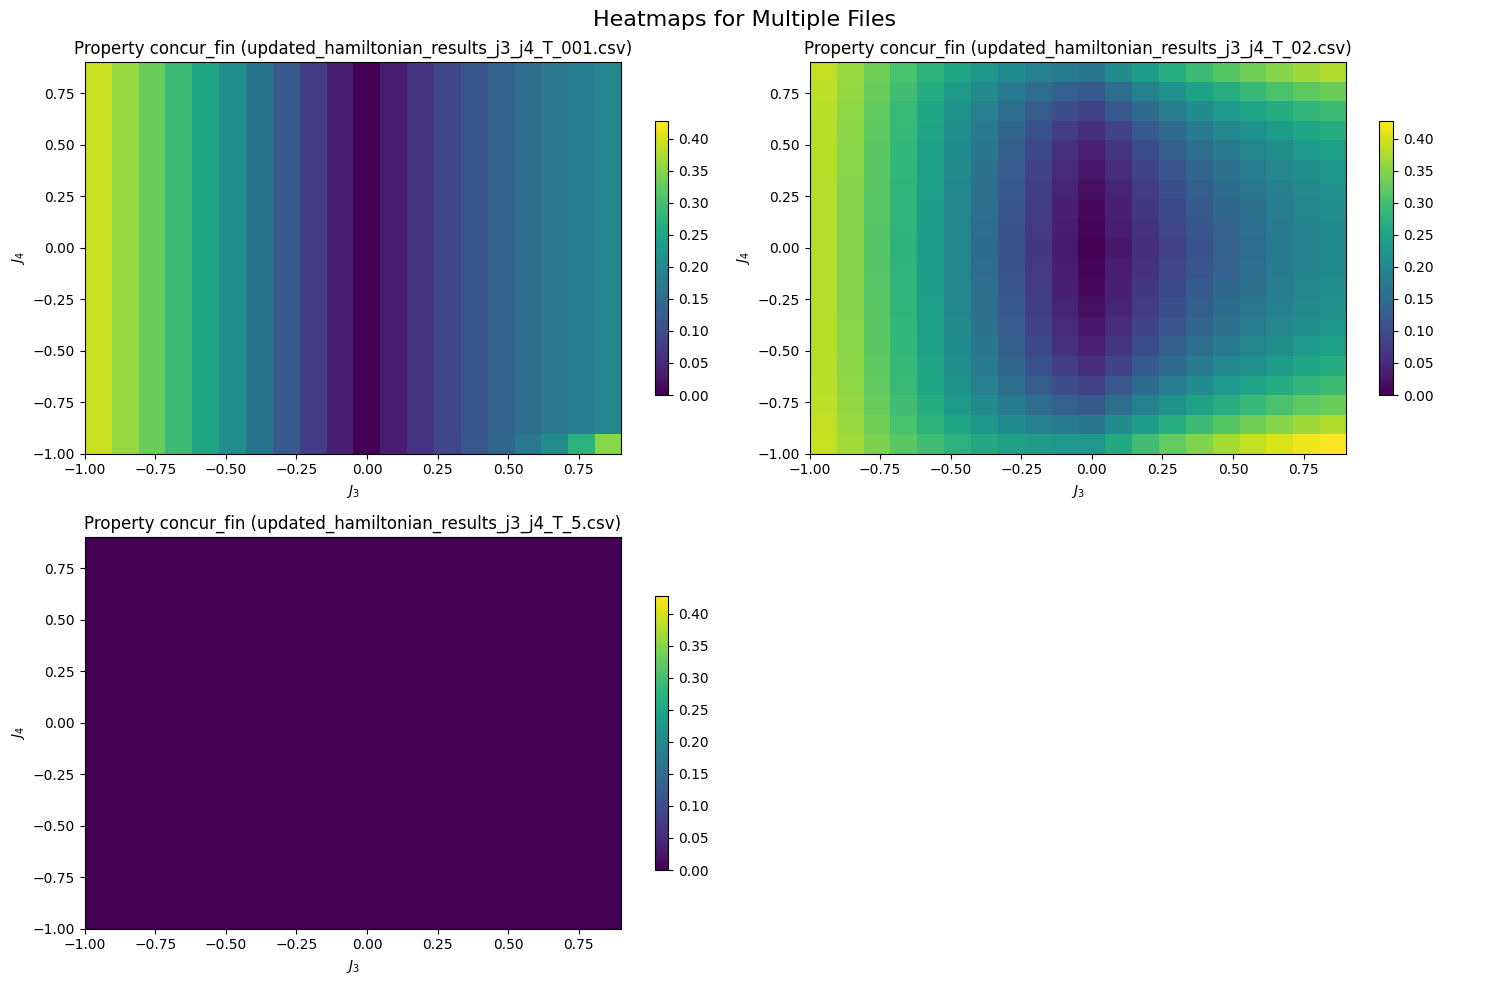

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmaps_from_files(file_paths, x_col, y_col, z_cols, xlabel, ylabel, zlabels, title="Heatmaps",vmin=None, vmax=None):
    """
    Generate a grid of heatmaps for multiple z_columns from multiple files with x_col and y_col as axes.

    Parameters:
    - file_paths: List of file paths for the data files.
    - x_col: Column name for the x-axis.
    - y_col: Column name for the y-axis.
    - z_cols: List of column names to plot as heatmaps (color variations).
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - zlabels: List of labels for the z-axis (colorbars).
    - title: Title for the overall figure.
    - vmin: Minimum value for the color range (optional).
    - vmax: Maximum value for the color range (optional).
    """
    num_files = len(file_paths)
    grid_size = int(np.ceil(np.sqrt(num_files)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 10))
    
    # If there is only one plot, ensure axes is iterable
    if num_files == 1:
        axes = np.array([axes])
    axes = axes.ravel()
    # Determine global min and max for the color range if not provided
    if vmin is None or vmax is None:
        z_min, z_max = np.inf, -np.inf
        for file_path in file_paths:
            data = pd.read_csv(file_path)
            for z_col in z_cols:
                z_min = min(z_min, data[z_col].min())
                z_max = max(z_max, data[z_col].max())
        vmin = z_min if vmin is None else vmin
        vmax = z_max if vmax is None else vmax

    
    for i, file_path in enumerate(file_paths):
        # Load the data file
        data = pd.read_csv(file_path)
        # Create heatmaps for each z_col in the file
        for z_col, zlabel in zip(z_cols, zlabels):
            pivot_table = data.pivot_table(index=y_col, columns=x_col, values=z_col)
            im = axes[i].imshow(
                pivot_table, origin="lower", aspect="auto",
                extent=[data[x_col].min(), data[x_col].max(), data[y_col].min(), data[y_col].max()],
                cmap="viridis", vmin=vmin, vmax=vmax
            )
            print(pivot_table)

            axes[i].set_xlabel(xlabel)
            axes[i].set_ylabel(ylabel)
            axes[i].set_title(f"{zlabel} ({file_path.split('/')[-1]})")
            fig.colorbar(im, ax=axes[i], orientation='vertical', shrink=0.7)
    
    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    # Save the figure if save_path is provided
    save_path="heatmap_plot.png"
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved as: {save_path}")
    
    plt.show()
    plt.show()

# Example Usage
file_paths_1 = [
    "updated_hamiltonian_results_j3_j4_T_001.csv",
    "updated_hamiltonian_results_j3_j4_T_02.csv",
    "updated_hamiltonian_results_j3_j4_T_5.csv"
]

# Specify the columns to plot
x_col = "j3"
y_col = "j4"
z_cols = ["concur_fin"]  # Replace with actual column names
zlabels = [f"Property {col}" for col in z_cols]

# Call the function to generate the plots
plot_heatmaps_from_files(file_paths_1, x_col, y_col, z_cols, xlabel=r"$J_3$", ylabel=r"$J_4$", zlabels=zlabels, title="Heatmaps for Multiple Files")


j2        -1.0      -0.9      -0.8      -0.7      -0.6      -0.5      -0.4  \
j4                                                                           
-1.0  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.9  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.8  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.7  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.6  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.5  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.4  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.3  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.2  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.1  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953  0.164527   
-0.0  0.390868  0.362195  0.329378  0.292493  0.252039  0.208953

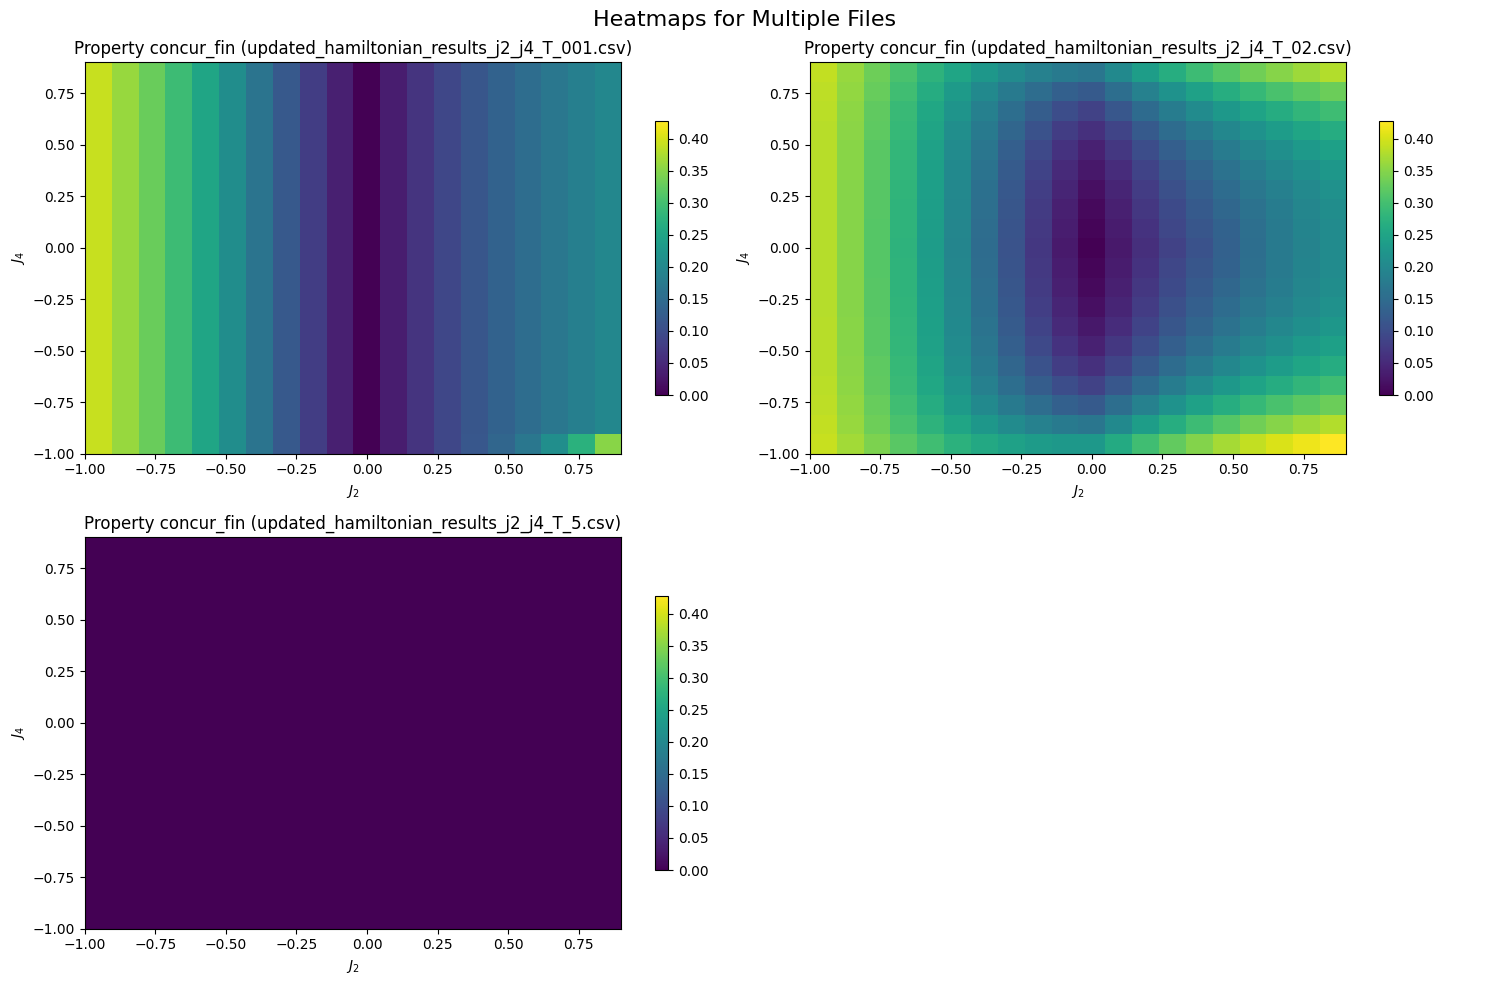

In [3]:
# Example Usage
file_paths_2 = [
    "updated_hamiltonian_results_j2_j4_T_001.csv",
    "updated_hamiltonian_results_j2_j4_T_02.csv",
    "updated_hamiltonian_results_j2_j4_T_5.csv"
]

# Specify the columns to plot
x_col = "j2"
y_col = "j4"
z_cols = ["concur_fin"]  # Replace with actual column names
zlabels = [f"Property {col}" for col in z_cols]

# Call the function to generate the plots
plot_heatmaps_from_files(file_paths_2, x_col, y_col, z_cols, xlabel=r"$J_2$", ylabel=r"$J_4$", zlabels=zlabels, title="Heatmaps for Multiple Files")

j3 j4
j3       -1.0     -0.9      -0.8      -0.7      -0.6      -0.5      -0.4  \
j4                                                                         
0.0  0.387988  0.33144  0.294383  0.264681  0.240406  0.220491  0.204281   

j3       -0.3      -0.2      -0.1     -0.0       0.1       0.2       0.3  \
j4                                                                         
0.0  0.191315  0.181257  0.173836  0.16882  0.166009  0.165225  0.166296   

j3        0.4      0.5       0.6       0.7       0.8       0.9  
j4                                                              
0.0  0.169067  0.17339  0.179128  0.186154  0.194347  0.203595  
j3       -1.0      -0.9    -0.8      -0.7      -0.6      -0.5      -0.4  \
j4                                                                        
0.0  0.309292  0.274901  0.2416  0.216299  0.200071  0.188823  0.180031   

j3       -0.3      -0.2     -0.1      -0.0       0.1       0.2       0.3  \
j4                                     

C:\Users\deepg\AppData\Local\Temp\ipykernel_27492\1504904740.py:48: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = axes[i].imshow(
C:\Users\deepg\AppData\Local\Temp\ipykernel_27492\1504904740.py:48: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = axes[i].imshow(


Figure saved as: heatmap_plot.png


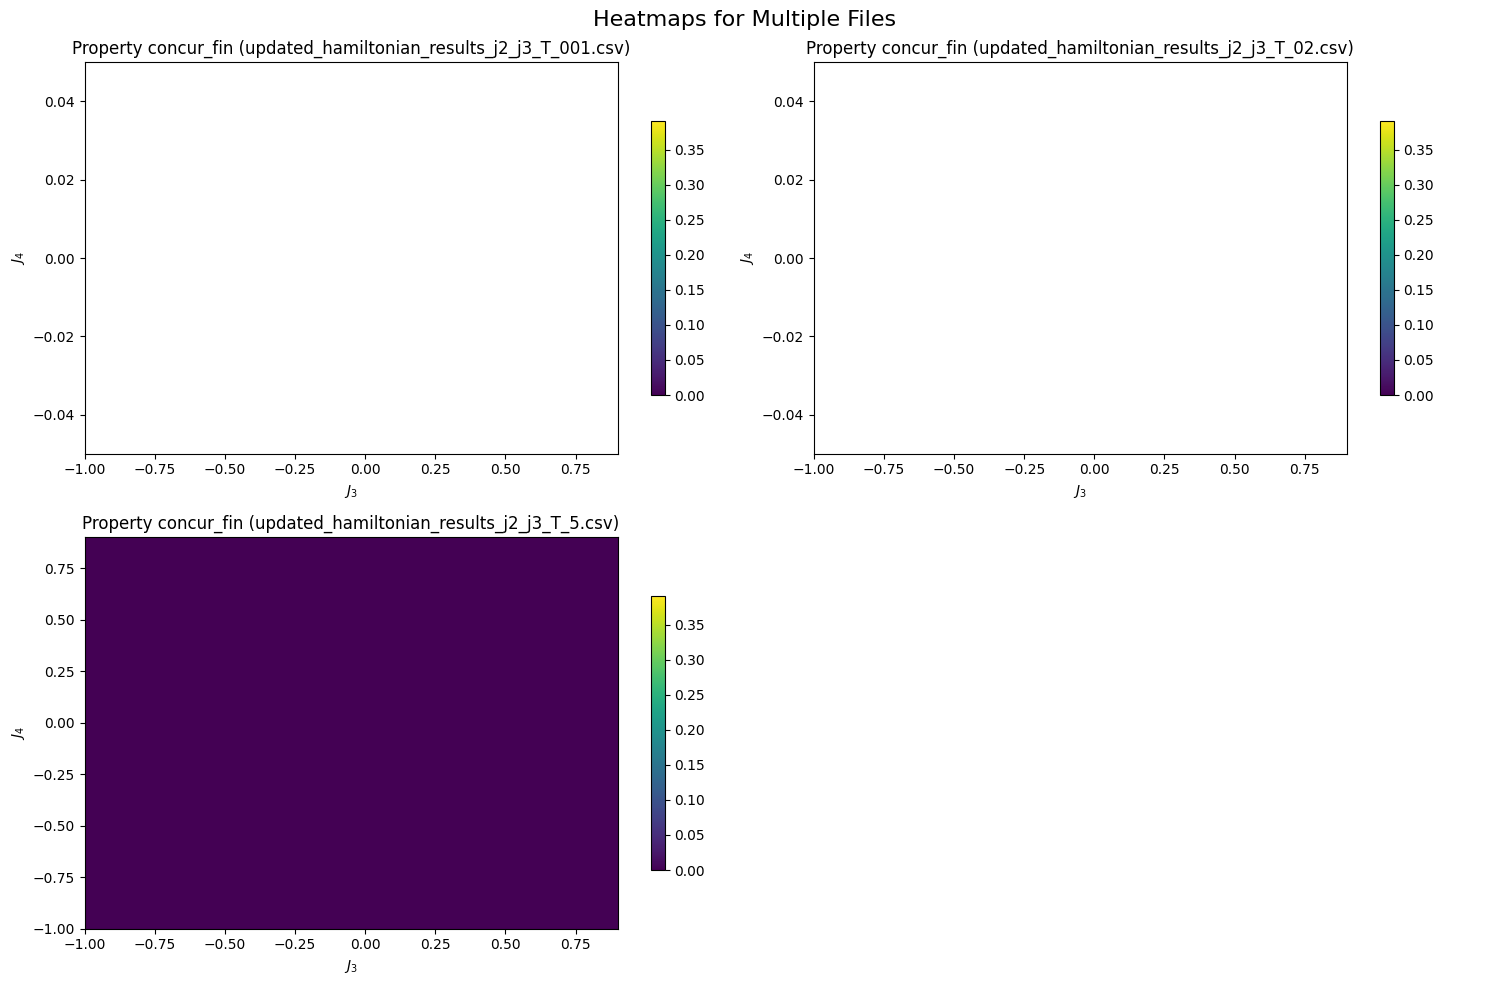

In [4]:
# Example Usage
file_paths_3 = [
    "updated_hamiltonian_results_j2_j3_T_001.csv",  # Replace with your file paths
    "updated_hamiltonian_results_j2_j3_T_02.csv",
    "updated_hamiltonian_results_j2_j3_T_5.csv"
]

# Specify the columns to plot
x_col = "j3"
y_col = "j4"
print(x_col,y_col)
z_cols = ["concur_fin"]  # Replace with actual column names
zlabels = [f"Property {col}" for col in z_cols]

# Call the function to generate the plots
plot_heatmaps_from_files(file_paths_3, x_col, y_col, z_cols, xlabel=r"$J_3$", ylabel=r"$J_4$", zlabels=zlabels, title="Heatmaps for Multiple Files")

Figure saved as: heatmap_plot.png


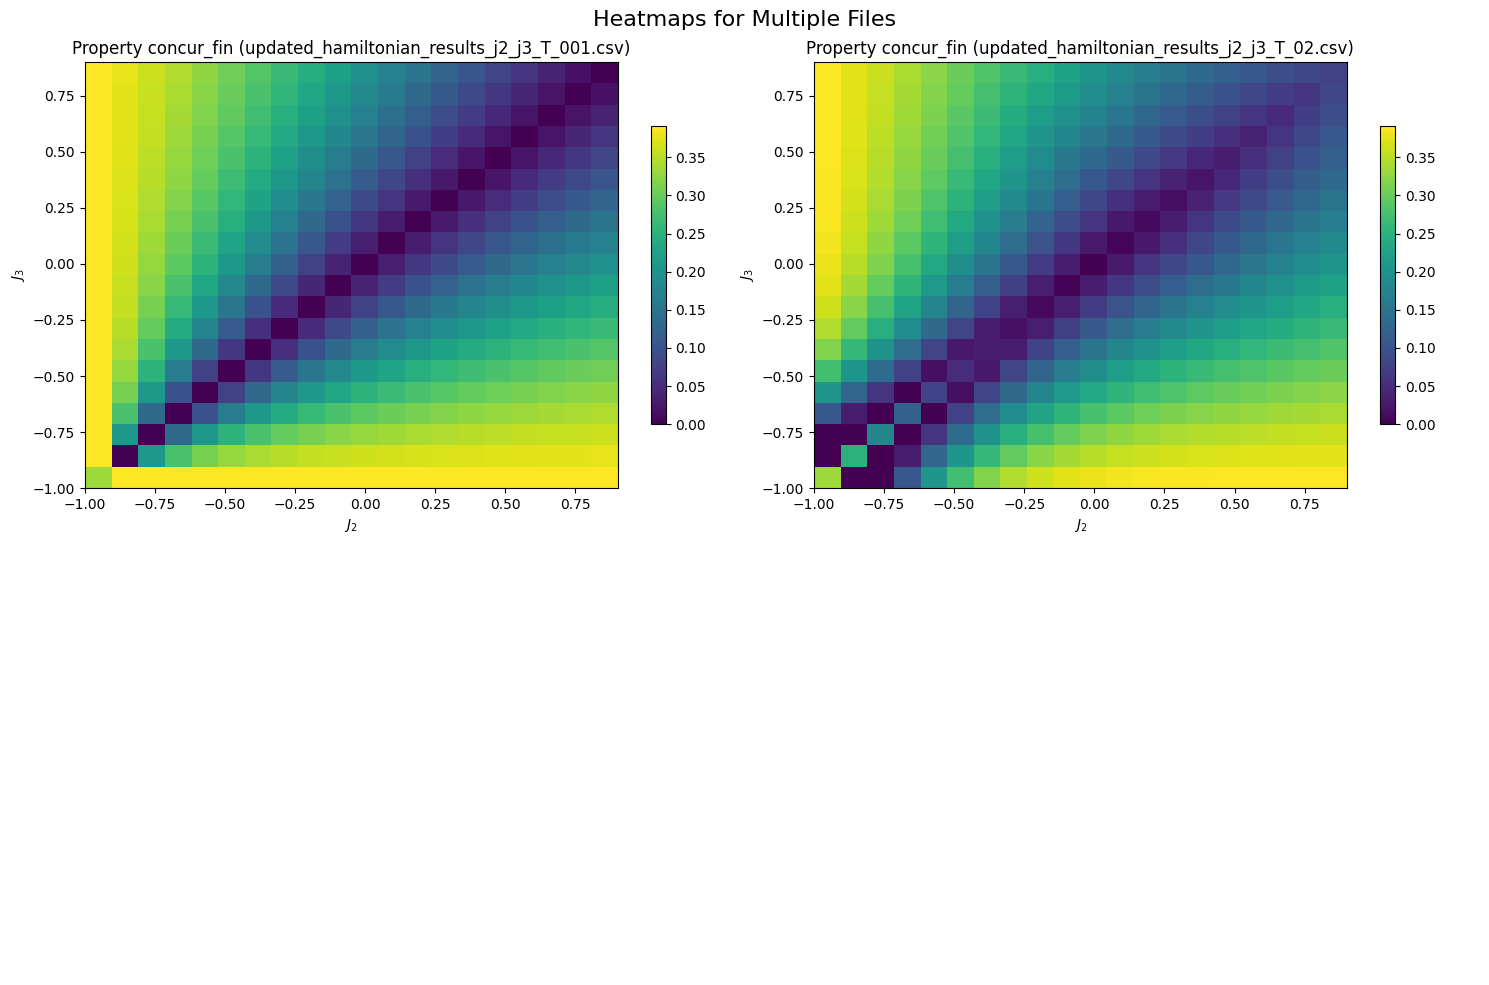

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmaps_from_files(file_paths, x_col, y_col, z_cols, xlabel, ylabel, zlabels, title="Heatmaps", vmin=None, vmax=None):
    """
    Generate a grid of heatmaps for multiple z_columns from multiple files with x_col and y_col as axes.
    
    Parameters:
    - file_paths: List of file paths for the data files.
    - x_col: Column name for the x-axis.
    - y_col: Column name for the y-axis.
    - z_cols: List of column names to plot as heatmaps (color variations).
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - zlabels: List of labels for the z-axis (colorbars).
    - title: Title for the overall figure.
    - vmin: Minimum value for the color range (optional).
    - vmax: Maximum value for the color range (optional).
    """
    num_files = len(file_paths)
    grid_size = int(np.ceil(np.sqrt(num_files)))
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 10))
    
    if num_files == 1:
        axes = np.array([axes])
    axes = axes.ravel()
    
    if vmin is None or vmax is None:
        z_min, z_max = np.inf, -np.inf
        for file_path in file_paths:
            data = pd.read_csv(file_path)
            for z_col in z_cols:
                z_min = min(z_min, data[z_col].min())
                z_max = max(z_max, data[z_col].max())
        vmin = z_min if vmin is None else vmin
        vmax = z_max if vmax is None else vmax
    
    for i, file_path in enumerate(file_paths):
        data = pd.read_csv(file_path)
        for z_col, zlabel in zip(z_cols, zlabels):
            pivot_table = data.pivot_table(index=y_col, columns=x_col, values=z_col)
            
            im = axes[i].imshow(
                pivot_table, origin="lower", aspect="auto",
                extent=[data[x_col].min(), data[x_col].max(), data[y_col].min(), data[y_col].max()],
                cmap="viridis", vmin=vmin, vmax=vmax
            )
            
            axes[i].set_xlabel(xlabel)
            axes[i].set_ylabel(ylabel)
            axes[i].set_title(f"{zlabel} ({file_path.split('/')[-1]})")
            fig.colorbar(im, ax=axes[i], orientation='vertical', shrink=0.7)
    
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    save_path="heatmap_plot.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved as: {save_path}")
    plt.show()

# Example Usage
file_paths = [
    "updated_hamiltonian_results_j2_j3_T_001.csv",
    "updated_hamiltonian_results_j2_j3_T_02.csv"
]

x_col = "j2"
y_col = "j3"
z_cols = ["concur_fin"]  # Replace with actual column names
zlabels = [f"Property {col}" for col in z_cols]

plot_heatmaps_from_files(file_paths, x_col, y_col, z_cols, xlabel=r"$J_2$", ylabel=r"$J_3$", zlabels=zlabels, title="Heatmaps for Multiple Files")


In [6]:
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_concur_fin_heatmaps(file_paths, x_col, y_col, z_col, xlabel, ylabel, zlabel, title="Concur_fin Heatmaps"):
    """
    Generate a heatmap for each file, plotting x_col vs. y_col with z_col as color.

    Parameters:
    - file_paths: List of file paths for the data files.
    - x_col: Column name for the x-axis.
    - y_col: Column name for the y-axis.
    - z_col: Column name for the z-axis (color variation).
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - zlabel: Label for the z-axis (colorbar).
    - title: Title for the overall figure.
    """
    num_files = len(file_paths)
    grid_size = int(np.ceil(np.sqrt(num_files)))  # Determine the grid size for subplots

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 10))
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, file_path in enumerate(file_paths):
        # Load the data file
        data = pd.read_csv(file_path)
        
        # Create a pivot table for heatmap plotting
        pivot_table = data.pivot_table(index=y_col, columns=x_col, values=z_col)
        
        # Plot the heatmap
        im = axes[i].imshow(
            pivot_table, origin="lower", aspect="auto",
            extent=[data[x_col].min(), data[x_col].max(), data[y_col].min(), data[y_col].max()],
            cmap="viridis"
        )
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
        axes[i].set_title(f"{zlabel} ({file_path.split('/')[-1]})")
        
        # Add a colorbar for each subplot
        fig.colorbar(im, ax=axes[i], orientation='vertical', shrink=0.7)

    # Turn off unused subplots if the grid is larger than the number of files
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Example Usage
file_paths4 = [
    "updated_hamiltonian_results_j2_j3_T_001.csv",  # Replace with your file paths
    "updated_hamiltonian_results_j2_j3_T_02.csv",
    "updated_hamiltonian_results_j2_j3_T_5.csv"   # Add more file paths as needed
]

# Specify columns to plot
x_col = "j3"  # x-axis: J3
y_col = "j4"  # y-axis: J4
z_col = "concur_fin"  # z-axis: Concur_fin (color variation)

# Call the function to generate the plots
plot_concur_fin_heatmaps(
    file_paths4, x_col, y_col, z_col,
    xlabel=r"$J_3$", ylabel=r"$J_4$", zlabel="Concur_fin",
    title="Heatmaps of Concur_fin (J3 vs J4)"
)'''


'\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\n\ndef plot_concur_fin_heatmaps(file_paths, x_col, y_col, z_col, xlabel, ylabel, zlabel, title="Concur_fin Heatmaps"):\n    """\n    Generate a heatmap for each file, plotting x_col vs. y_col with z_col as color.\n\n    Parameters:\n    - file_paths: List of file paths for the data files.\n    - x_col: Column name for the x-axis.\n    - y_col: Column name for the y-axis.\n    - z_col: Column name for the z-axis (color variation).\n    - xlabel: Label for the x-axis.\n    - ylabel: Label for the y-axis.\n    - zlabel: Label for the z-axis (colorbar).\n    - title: Title for the overall figure.\n    """\n    num_files = len(file_paths)\n    grid_size = int(np.ceil(np.sqrt(num_files)))  # Determine the grid size for subplots\n\n    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 10))\n    axes = axes.ravel()  # Flatten the axes array for easy iteration\n\n    for i, file_path in enumerate(file_paths):\

Figure saved as: heatmap_plot.png


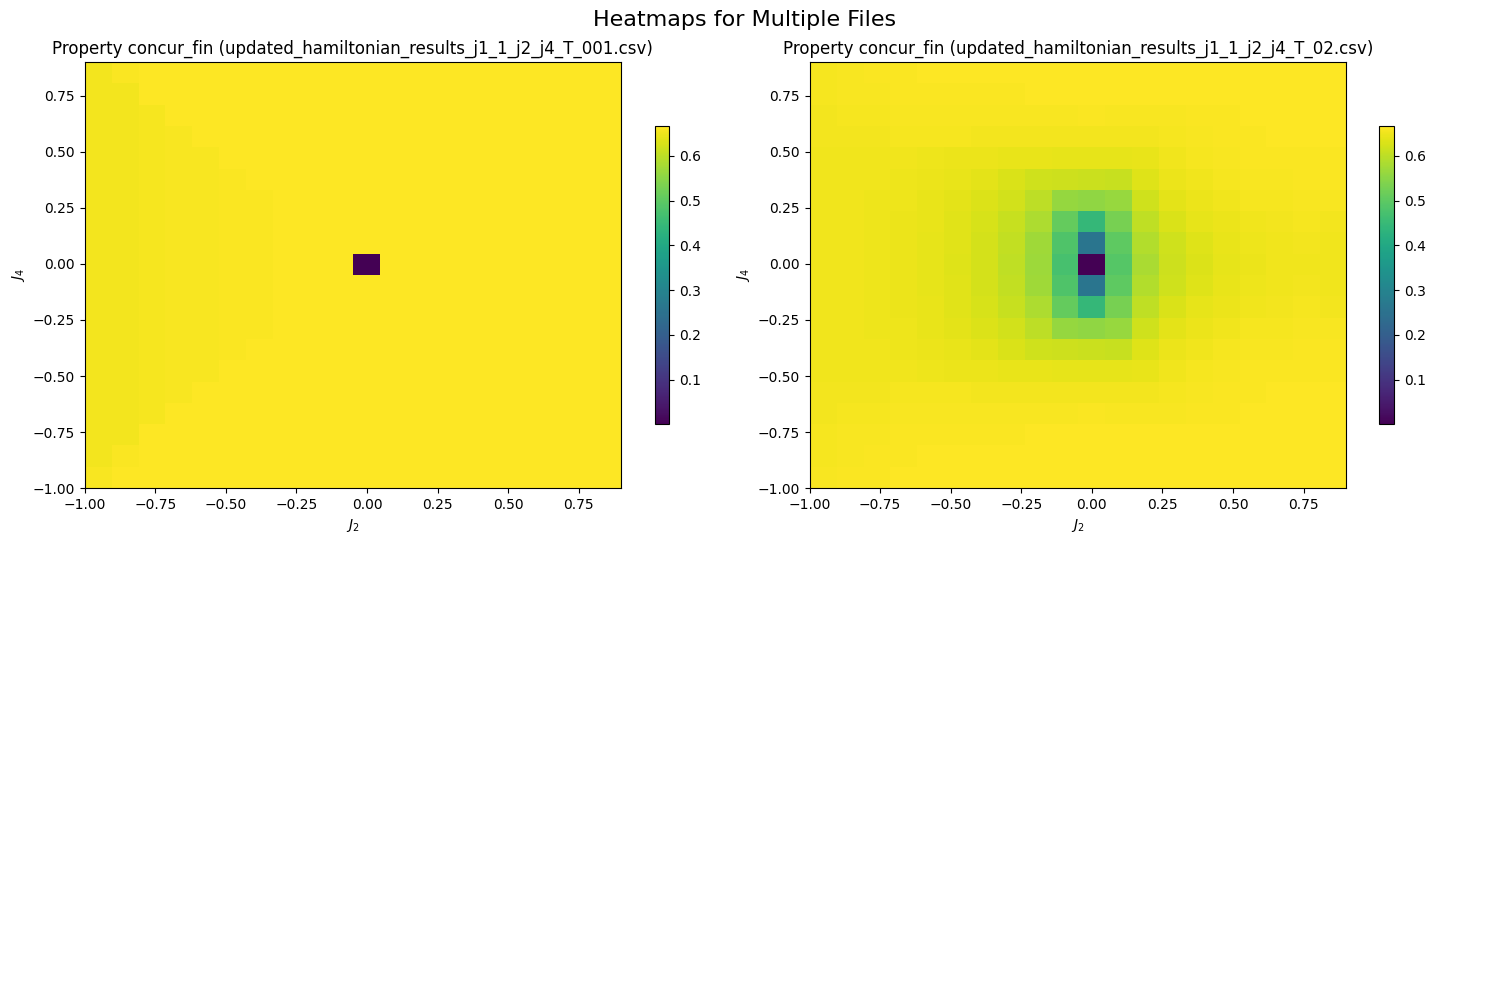

In [18]:
# Example Usage
file_paths_2 = [
    "updated_hamiltonian_results_j1_1_j2_j4_T_001.csv",
    "updated_hamiltonian_results_j1_1_j2_j4_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j2_j4_T_5.csv"
]

# Specify the columns to plot
x_col = "j2"
y_col = "j4"
z_cols = ["concur_fin"]  # Replace with actual column names
zlabels = [f"Property {col}" for col in z_cols]

# Call the function to generate the plots
plot_heatmaps_from_files(file_paths_2, x_col, y_col, z_cols, xlabel=r"$J_2$", ylabel=r"$J_4$", zlabels=zlabels, title="Heatmaps for Multiple Files")

j2 j3
Figure saved as: heatmap_plot.png


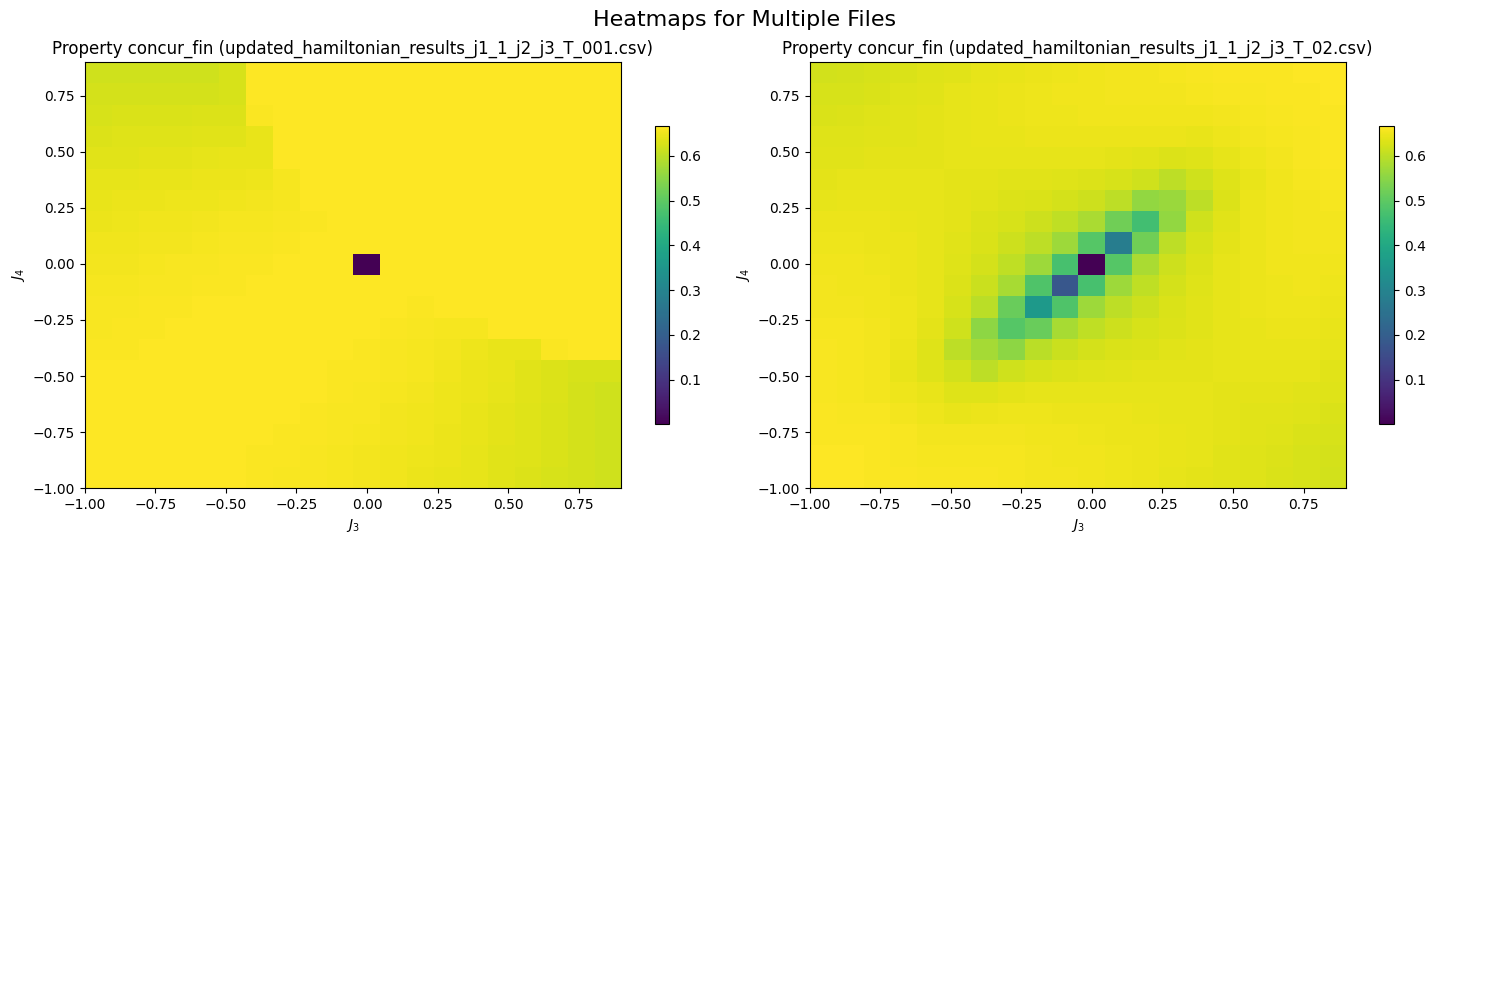

In [8]:
# Example Usage
file_paths_3 = [
    "updated_hamiltonian_results_j1_1_j2_j3_T_001.csv",  # Replace with your file paths
    "updated_hamiltonian_results_j1_1_j2_j3_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j2_j3_T_5.csv"
]

# Specify the columns to plot
x_col = "j2"
y_col = "j3"
print(x_col,y_col)
z_cols = ["concur_fin"]  # Replace with actual column names
zlabels = [f"Property {col}" for col in z_cols]

# Call the function to generate the plots
plot_heatmaps_from_files(file_paths_3, x_col, y_col, z_cols, xlabel=r"$J_3$", ylabel=r"$J_4$", zlabels=zlabels, title="Heatmaps for Multiple Files")

Figure saved as: heatmap_plot.png


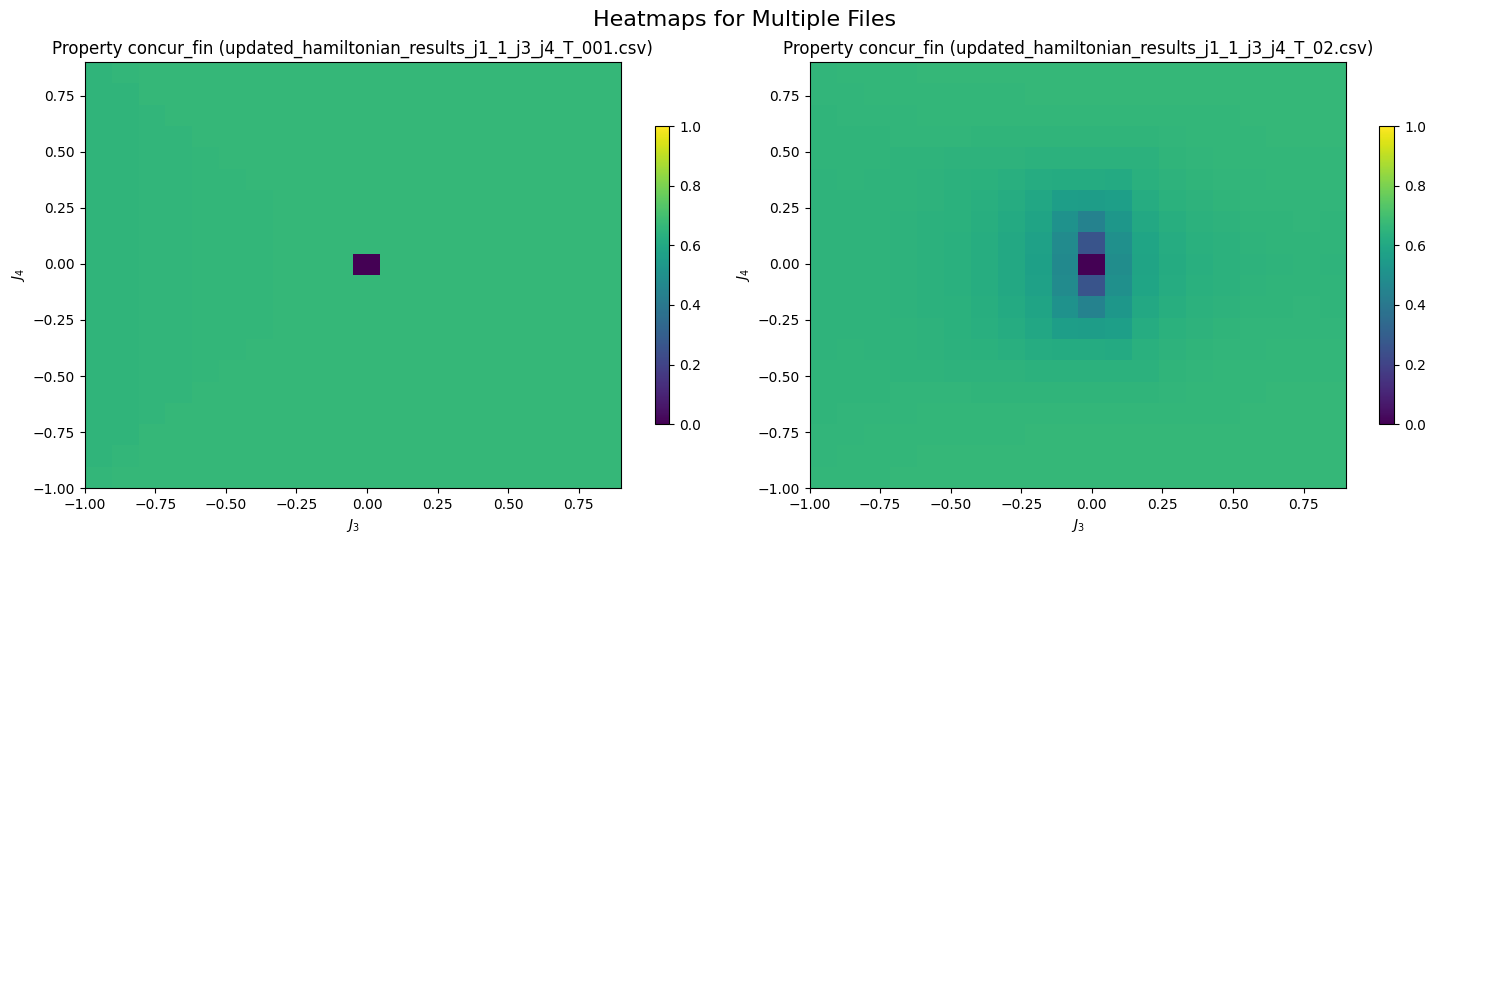

In [16]:
# Example Usage
file_paths_1 = [
    "updated_hamiltonian_results_j1_1_j3_j4_T_001.csv",
    "updated_hamiltonian_results_j1_1_j3_j4_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j3_j4_T_5.csv"
]

# Specify the columns to plot
x_col = "j3"
y_col = "j4"
z_cols = ["concur_fin"]  # Replace with actual column names
zlabels = [f"Property {col}" for col in z_cols]

# Call the function to generate the plots
plot_heatmaps_from_files(file_paths_1, x_col, y_col, z_cols, xlabel=r"$J_3$", ylabel=r"$J_4$", zlabels=zlabels, title="Heatmaps for Multiple Files",vmin=0, vmax=1)

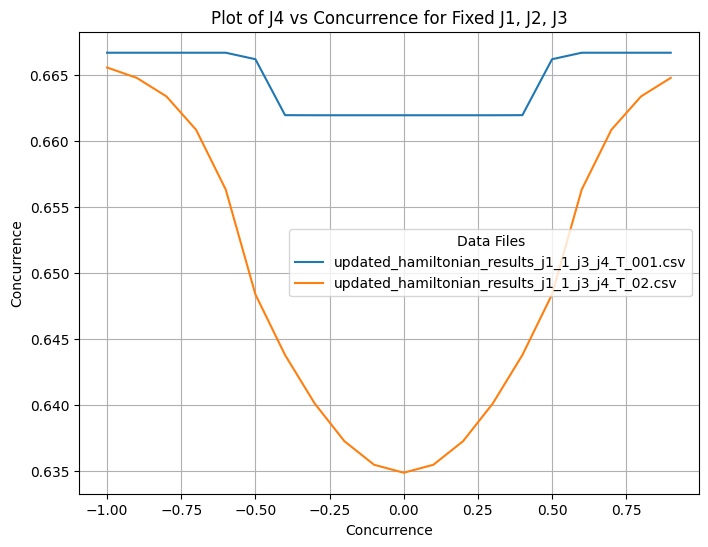

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_j4_vs_concurrence(file_paths, x_col, y_col, z_col, fixed_params, xlabel, ylabel, zlabel, title="Plot of J4 vs Concurrence"):
    """
    Generate plots of J4 (y_col) vs concurrence (z_col) for fixed values of J1, J2, and J3.

    Parameters:
    - file_paths: List of file paths for the data files.
    - x_col: Column name for the x-axis.
    - y_col: Column name for the y-axis (J4).
    - z_col: Column name for the z-axis (concurrence).
    - fixed_params: Dictionary of fixed parameter values (e.g., {'j1': value, 'j2': value, 'j3': value}).
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - zlabel: Label for the z-axis (colorbar).
    - title: Title for the overall figure.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for file_path in file_paths:
        # Load the data file
        data = pd.read_csv(file_path)

        # Apply filtering based on fixed parameters
        for param, value in fixed_params.items():
            data = data[data[param] == value]

        if data.empty:
            print(f"No data matches the fixed parameters in file: {file_path}")
            continue

        # Plot J4 vs concurrence
        ax.plot(data[y_col], data[z_col], label=f"{file_path.split('/')[-1]}")
    
    ax.set_xlabel(ylabel)
    ax.set_ylabel(zlabel)
    ax.set_title(title)
    ax.legend(title="Data Files", loc='best')
    plt.grid()
    plt.show()

# Example Usage
file_paths_2 = [
    "updated_hamiltonian_results_j1_1_j3_j4_T_001.csv",
    "updated_hamiltonian_results_j1_1_j3_j4_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j3_j4_T_5.csv"
]

# Specify fixed parameter values and columns
fixed_params = {"j1": 1, "j2": 0, "j3": -0.5}  # Example fixed values
y_col = "j4"  # Column for the y-axis
z_col = "concur_fin"  # Column for concurrence
xlabel = r"$J_4$"
ylabel = r"Concurrence"
title = "Plot of J4 vs Concurrence for Fixed J1, J2, J3"

# Call the function
plot_j4_vs_concurrence(
    file_paths_2, x_col=None, y_col=y_col, z_col=z_col,
    fixed_params=fixed_params, xlabel=xlabel, ylabel=ylabel, zlabel=ylabel, title=title
)


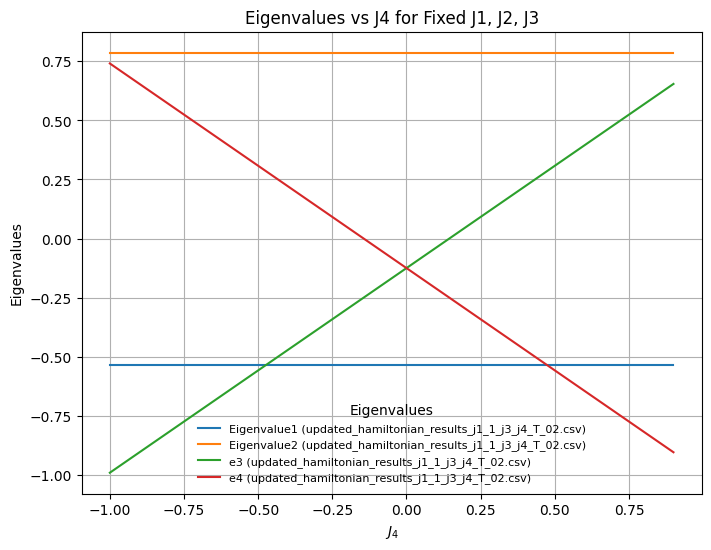

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_eigenvalues_vs_j4(file_paths, j4_col, eigenvalue_cols, fixed_params, xlabel, ylabel, title="Eigenvalues vs J4"):
    """
    Plot all eigenvalues vs J4 for a fixed J1, J2, J3.

    Parameters:
    - file_paths: List of file paths for the data files.
    - j4_col: Column name for the x-axis (J4).
    - eigenvalue_cols: List of column names representing eigenvalues.
    - fixed_params: Dictionary of fixed parameter values (e.g., {'j1': value, 'j2': value, 'j3': value}).
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - title: Title for the overall figure.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    for file_path in file_paths:
        # Load the data file
        data = pd.read_csv(file_path)

        # Apply filtering based on fixed parameters
        for param, value in fixed_params.items():
            data = data[data[param] == value]

        if data.empty:
            print(f"No matching data in {file_path} for fixed parameters {fixed_params}. Skipping...")
            continue

        # Plot each eigenvalue column against J4
        for eigen_col in eigenvalue_cols:
            ax.plot(data[j4_col], data[eigen_col], label=f"{eigen_col} ({file_path.split('/')[-1]})")

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(title="Eigenvalues", loc='best', fontsize=8, frameon=False)
    plt.grid()
    plt.show()

# Example Usage
file_paths_2 = [
    #"updated_hamiltonian_results_j1_1_j3_j4_T_001.csv"
    "updated_hamiltonian_results_j1_1_j3_j4_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j3_j4_T_5.csv"
]

# Specify fixed parameter values and columns
fixed_params = {"j1": 1, "j2": 0, "j3": -0.5}  # Example fixed values
# Specify columns
j4_col = "j4"  # Column for J4 (x-axis)
eigenvalue_cols = ["Eigenvalue1", "Eigenvalue2", "e3", "e4"]  # Replace with actual eigenvalue column names
xlabel = r"$J_4$"
ylabel = "Eigenvalues"
title = "Eigenvalues vs J4 for Fixed J1, J2, J3"

# Call the function
plot_eigenvalues_vs_j4(file_paths_2, j4_col, eigenvalue_cols, fixed_params, xlabel, ylabel, title)


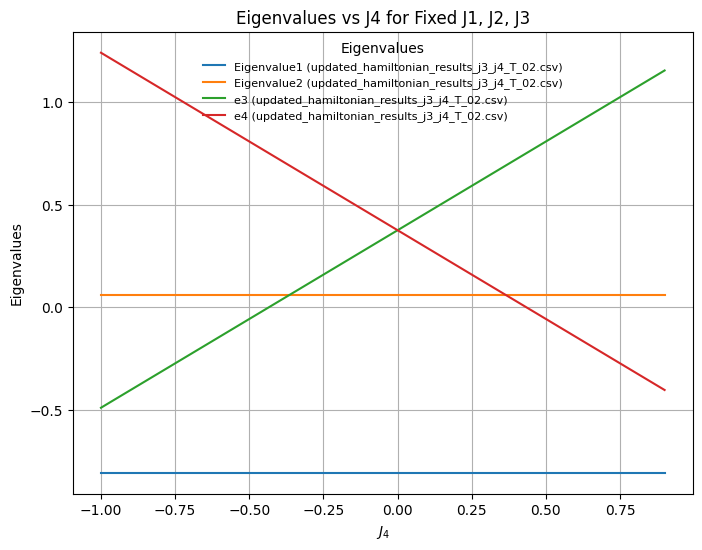

In [12]:
file_paths_3 = [
    #"updated_hamiltonian_results_j1_1_j3_j4_T_001.csv"
    "updated_hamiltonian_results_j3_j4_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j3_j4_T_5.csv"
]

# Specify fixed parameter values and columns
fixed_params = {"j1": -1, "j2": 0, "j3": -0.5}  # Example fixed values
# Specify columns
j4_col = "j4"  # Column for J4 (x-axis)
eigenvalue_cols = ["Eigenvalue1", "Eigenvalue2", "e3", "e4"]  # Replace with actual eigenvalue column names
xlabel = r"$J_4$"
ylabel = "Eigenvalues"
title = "Eigenvalues vs J4 for Fixed J1, J2, J3"
plot_eigenvalues_vs_j4(file_paths_3, j4_col, eigenvalue_cols, fixed_params, xlabel, ylabel, title)


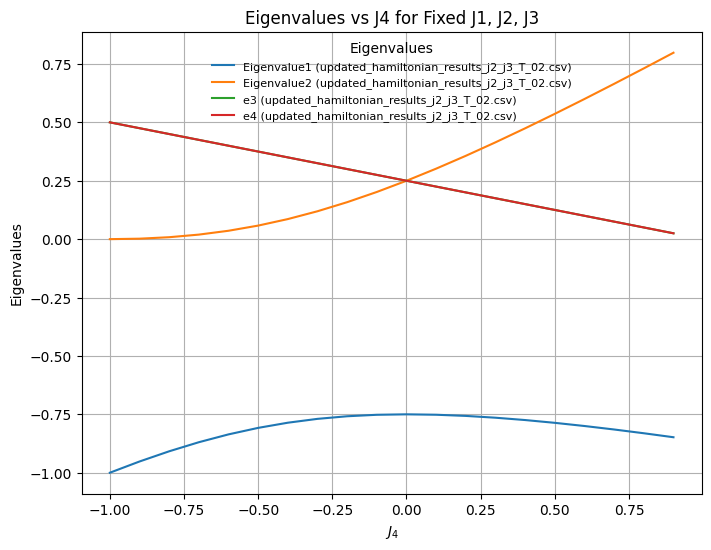

In [13]:
file_paths_3 = [
    #"updated_hamiltonian_results_j1_1_j3_j4_T_001.csv"
    "updated_hamiltonian_results_j2_j3_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j3_j4_T_5.csv"
]

# Specify fixed parameter values and columns
fixed_params = {"j1": -1, "j2": 0, "j4": 0}  # Example fixed values
# Specify columns
j4_col = "j3"  # Column for J4 (x-axis)
eigenvalue_cols = ["Eigenvalue1", "Eigenvalue2", "e3", "e4"]  # Replace with actual eigenvalue column names
xlabel = r"$J_4$"
ylabel = "Eigenvalues"
title = "Eigenvalues vs J4 for Fixed J1, J2, J3"
plot_eigenvalues_vs_j4(file_paths_3, j4_col, eigenvalue_cols, fixed_params, xlabel, ylabel, title)


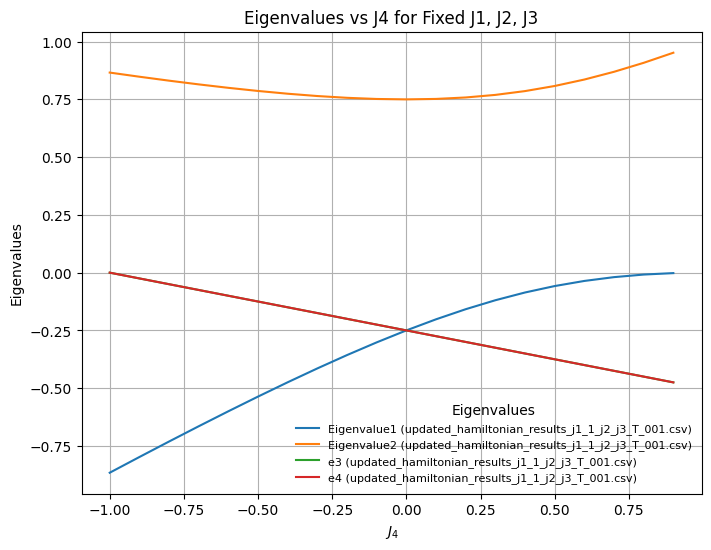

In [14]:
file_paths_3 = [
    "updated_hamiltonian_results_j1_1_j2_j3_T_001.csv"
    #"updated_hamiltonian_results_j2_j3_T_02.csv"
    #"updated_hamiltonian_results_j1_1_j3_j4_T_5.csv"
]

# Specify fixed parameter values and columns
fixed_params = {"j1": 1, "j2": 0, "j4": 0}  # Example fixed values
# Specify columns
j4_col = "j3"  # Column for J4 (x-axis)
eigenvalue_cols = ["Eigenvalue1", "Eigenvalue2", "e3", "e4"]  # Replace with actual eigenvalue column names
xlabel = r"$J_4$"
ylabel = "Eigenvalues"
title = "Eigenvalues vs J4 for Fixed J1, J2, J3"
plot_eigenvalues_vs_j4(file_paths_3, j4_col, eigenvalue_cols, fixed_params, xlabel, ylabel, title)
